# Exercise 6

## Part (a)

From the problem we know that 

$$p(X) = \dfrac{e^{\beta_0 + \beta_1X_1 + \beta_2X_2}}{1+e^{\beta_0 + \beta_1X_1 + \beta_2X_2}}.$$

So we can plug in our approximations for each coefficient and find the probability for $X_1=40$ and $X_2=3.5$:

$$p(X) \approx \dfrac{e^{-6 + 0.05X_1 + X_2}}{1+e^{-6 + 0.05X_1 + X_2}} = \boxed{0.378}$$

## Part (b)

For $p(X) = 1/2$, we can see that the $e^{\text{---}}$ term must equal 1, so the exponent $\beta_0 + \beta_1X_1 + \beta_2X_2$ must equal 0. Plugging in the value for each of the coefficients and $X_2$ then solving for $X_1$ gives:
$$-6 + 0.05X_1 + 3.5 = 0$$
$$X_1 = \boxed{50\text{ hrs}}$$

# Exercise 8

With $K = 1$, the training error rate is 0% because the nearest neighor is simply the point itself, so each training data point is assigned the label it actually is. Since the average error rate is 18% this means the test error rate is $\dfrac{0\% + \text{Test}}2 = 18\% \implies \text{Test} = 2\cdot18\% = 36\%$. 36% is higher than the logisitc regression test error rate of 30% so we should prefer logisitc regression.

# Exercise 9

## Part (a)

This means that $\dfrac{p(X)}{1-p(X)} = 0.37$ so we solve for $p(X)$ to get that $37/137$ of people with an odds of $0.37$ will actually default.

## Part (b)

We simply jsut plug 0.16 into the above formula to get that the odds are
$$\dfrac{0.16}{1-0.16} \approx 0.19.$$

# Exercise 10

## Part (a)

In [1]:
library(ISLR)

In [2]:
attach(Weekly)
fix(Weekly)

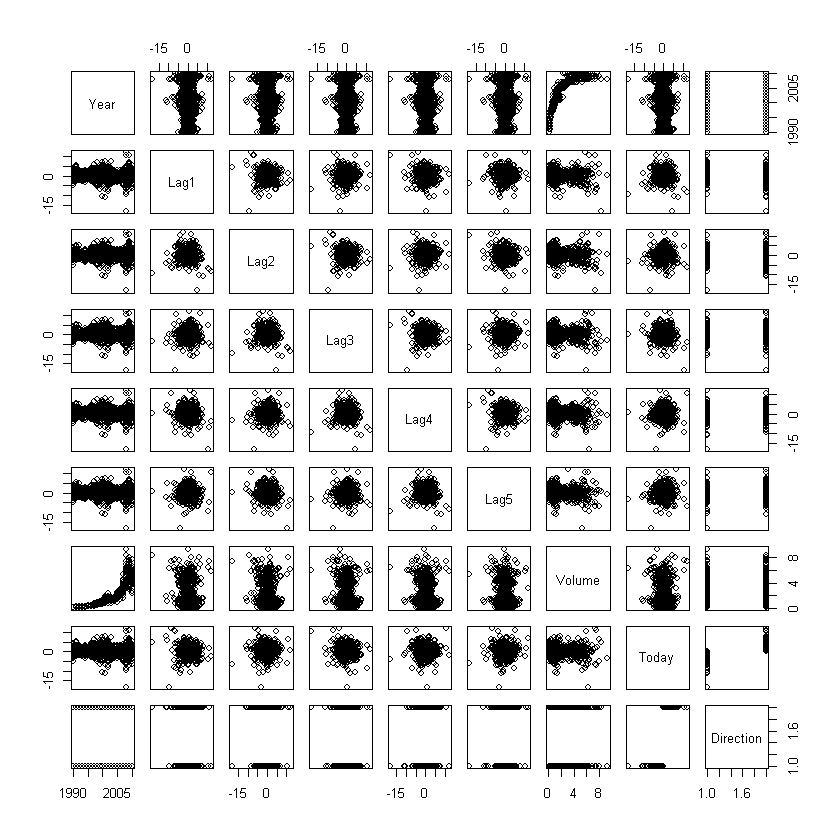

In [3]:
pairs(Weekly)

In [4]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

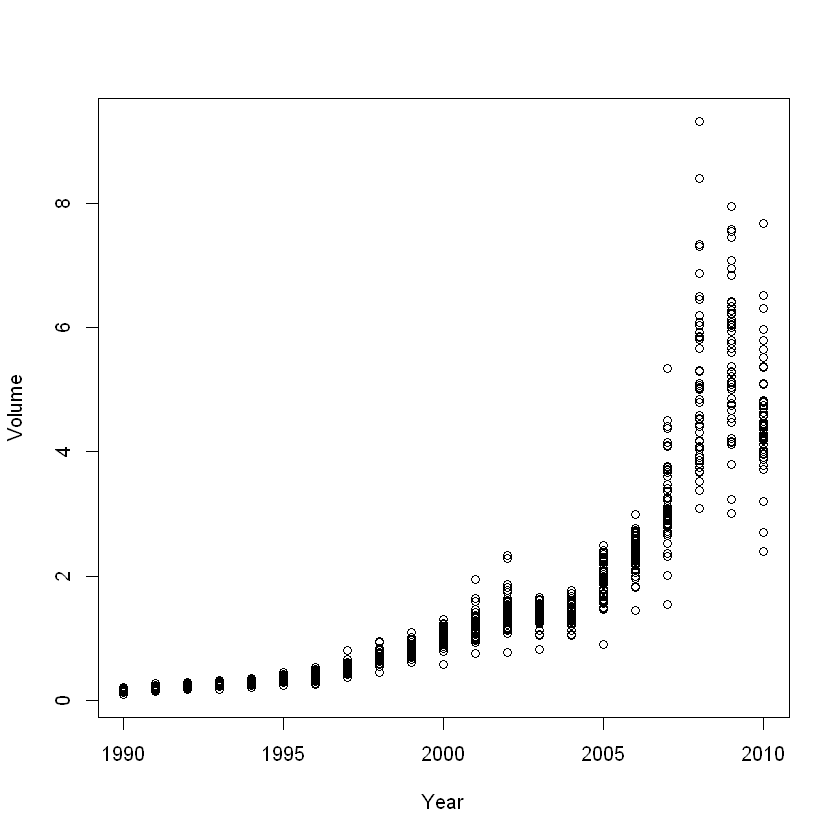

In [7]:
plot(Year, Volume)

The only really noticable trend is that volume seems to increase (almost exponentially?) with year.

## Part (b)

In [11]:
glm.fits =glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Weekly ,family=binomial )
summary(glm.fits)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


The only predictor that is statistically significant is Lag2, but even that is only significant to the 0.05 level.

## Part (c)

In [14]:
glm.probs=predict(glm.fits,type="response")
glm.pred=rep("Down" ,1089)
glm.pred[glm.probs >.5]="Up"
print(table(glm.pred ,Direction ))

        Direction
glm.pred Down  Up
    Down   54  48
    Up    430 557


In [15]:
(557+54)/1089

[1] 0.5610652

The model has an accuracy of 56.1%. The confusion matrix tells us what the model predicted compared to the actual answer. By looking at the off-diagonal, we can see that the model tends to predict up when the direction is actually down, more often than it predicts down when the direction is up.

## Part (d)

In [21]:
train=(Year<2009)
Weekly.2009= Weekly[!train ,]
Direction.2009= Direction[!train]

In [22]:
glm.fits =glm(Direction~Lag2, data=Weekly ,family=binomial, subset=train)

In [23]:
glm.probs=predict (glm.fits,Weekly.2009, type="response")
glm.pred=rep("Down",length(glm.probs))
glm.pred[glm.probs >.5]="Up"
table(glm.pred ,Direction.2009)

        Direction.2009
glm.pred Down Up
    Down    9  5
    Up     34 56

In [30]:
mean(glm.pred==Direction.2009)

[1] 0.625

The confusion matrix is given above and the fraction of correct predictions is 5/8.